<a href="https://colab.research.google.com/github/ndcastillo/sma-sampling-ecuador/blob/main/MuestreoSMA_Ecuador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In Ecuador there are three mobile cell phone operators, otecel, conecel and cnt. These companies provide four types of services.

1) CDMA

2) GSM(2G)

3) UMTS(3G)

4) HSPA+ (4G)

5) LTE(4G)

Now, we will observe  the evol of cell phone operators at time in Ecuador.

Libraries to use

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import io

In [3]:
from google.colab import files
uploaded = files.upload()

Saving tecnologiasma.csv to tecnologiasma (1).csv


In [4]:
smadata = pd.read_csv(io.BytesIO(uploaded["tecnologiasma.csv"]))
smadata.head() # 5 first registers

,fecha,nombre,cdma,gsma,umts,hspa+,lte
0,2009-01,conecel,0,7603388,684096,0,0
1,2009-02,conecel,0,7815731,572803,0,0
2,2009-03,conecel,0,7802923,660611,0,0
3,2009-04,conecel,0,7947261,593793,0,0
4,2009-05,conecel,0,8009207,622374,0,0


## Active Lines in Ecuador (2016-2022)
Five years previously to 2022

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


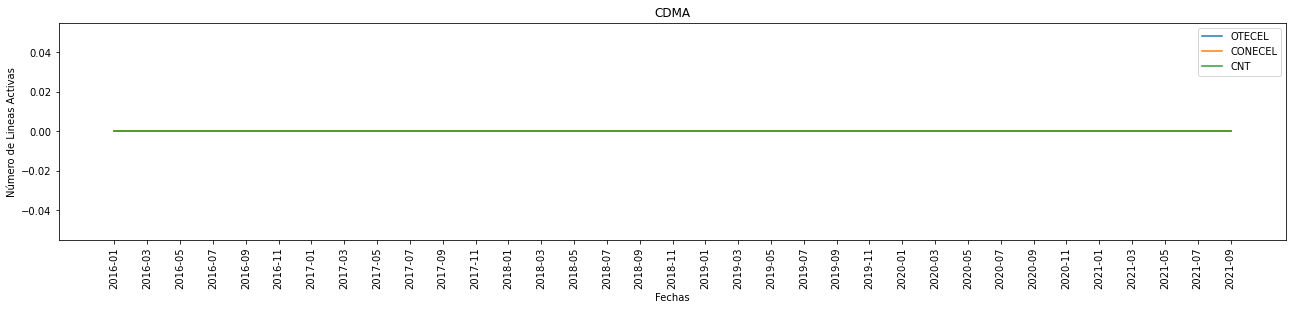

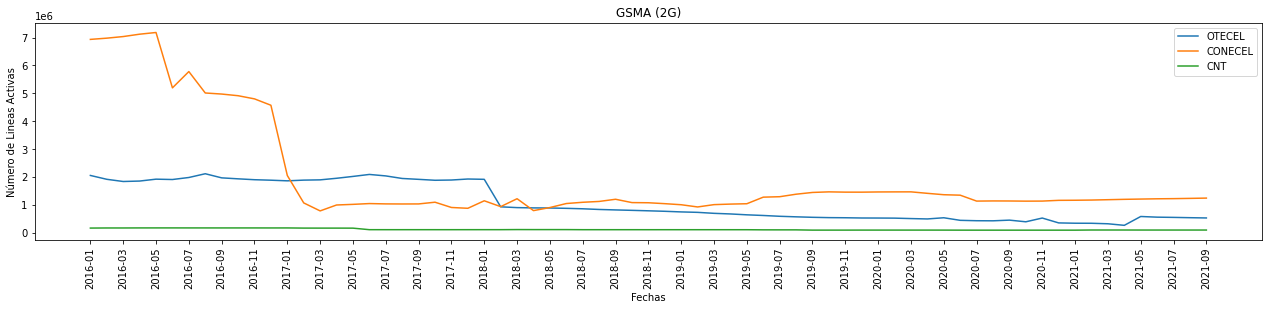

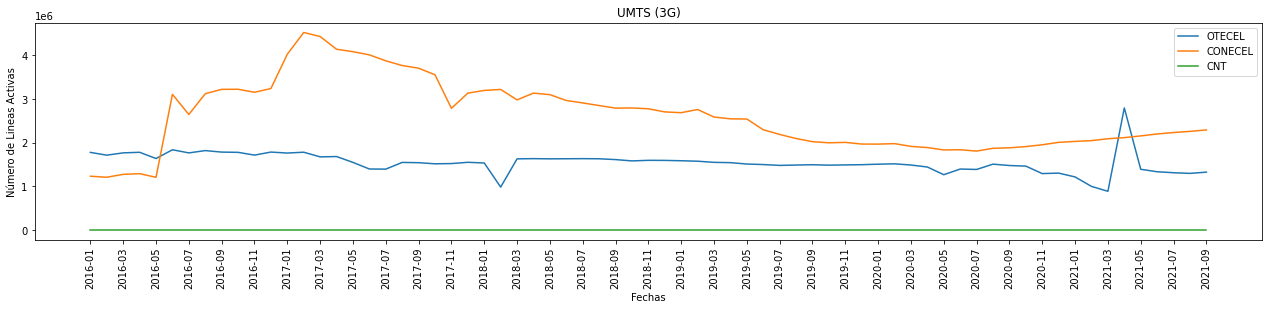

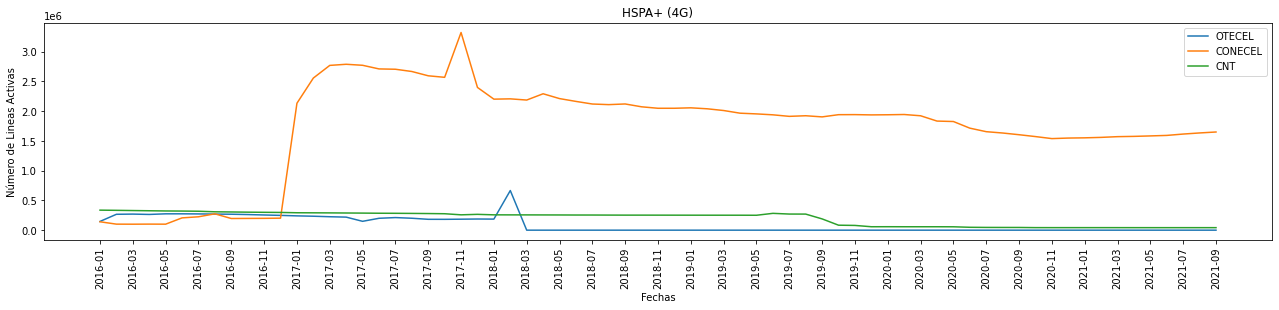

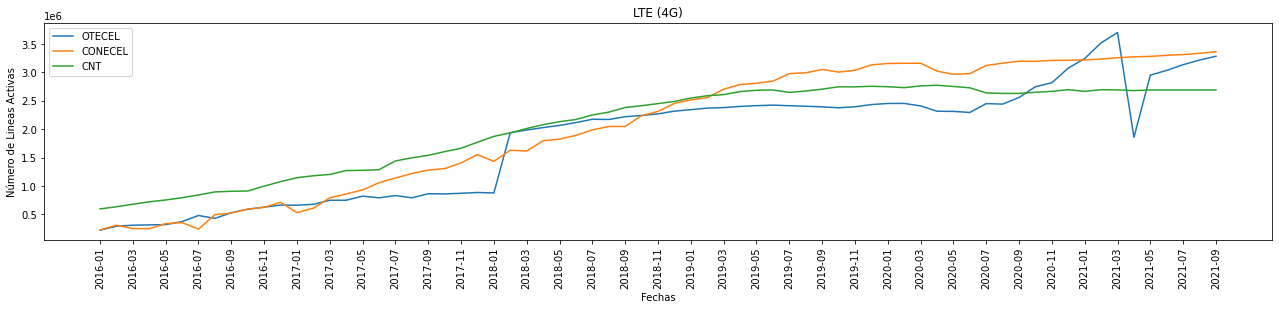

In [63]:
operators = ['otecel','conecel','cnt']
technologies = ['cdma','gsma','umts','hspa+','lte'] 
technologies_titles = ['cdma','gsma (2g)','umts (3g)','hspa+ (4g)','lte (4g)'] 
smadata['year'] = smadata['fecha']

for i in range(len(smadata)):
  smadata['year'][i] =  int(smadata['fecha'][i][:-3])

smadata_seg = smadata[smadata['year']>=(2021-5)]

for j in range(len(technologies)):
  plt.figure(figsize=(22,4))
  for i in range(len(operators)):
    df_seg = smadata_seg[smadata_seg['nombre'] == operators[i]]
    plt.xticks(rotation='vertical')
    plt.plot(df_seg['fecha'],df_seg[technologies[j]])

  #ticks
  xt=[]
  for x in df_seg['fecha']:
    if int(x[-2:])%2!=0:
      xt.append(x)

  plt.xlabel('Fechas')
  plt.ylabel('Número de Lineas Activas')  
  plt.title(technologies_titles[j].upper())
  plt.legend([x.upper() for x in operators])
  plt.xticks(xt,rotation='vertical')


In [7]:
smadata['lines'] = smadata['cdma']+smadata['gsma']+smadata['umts']+smadata['hspa+']+smadata['lte']
smadata.head()

,fecha,nombre,cdma,gsma,umts,hspa+,lte,year,lines
0,2009-01,conecel,0,7603388,684096,0,0,2009,8287484
1,2009-02,conecel,0,7815731,572803,0,0,2009,8388534
2,2009-03,conecel,0,7802923,660611,0,0,2009,8463534
3,2009-04,conecel,0,7947261,593793,0,0,2009,8541054
4,2009-05,conecel,0,8009207,622374,0,0,2009,8631581


## Market power of telephone operators

Text(0.5, 0, 'Fechas')

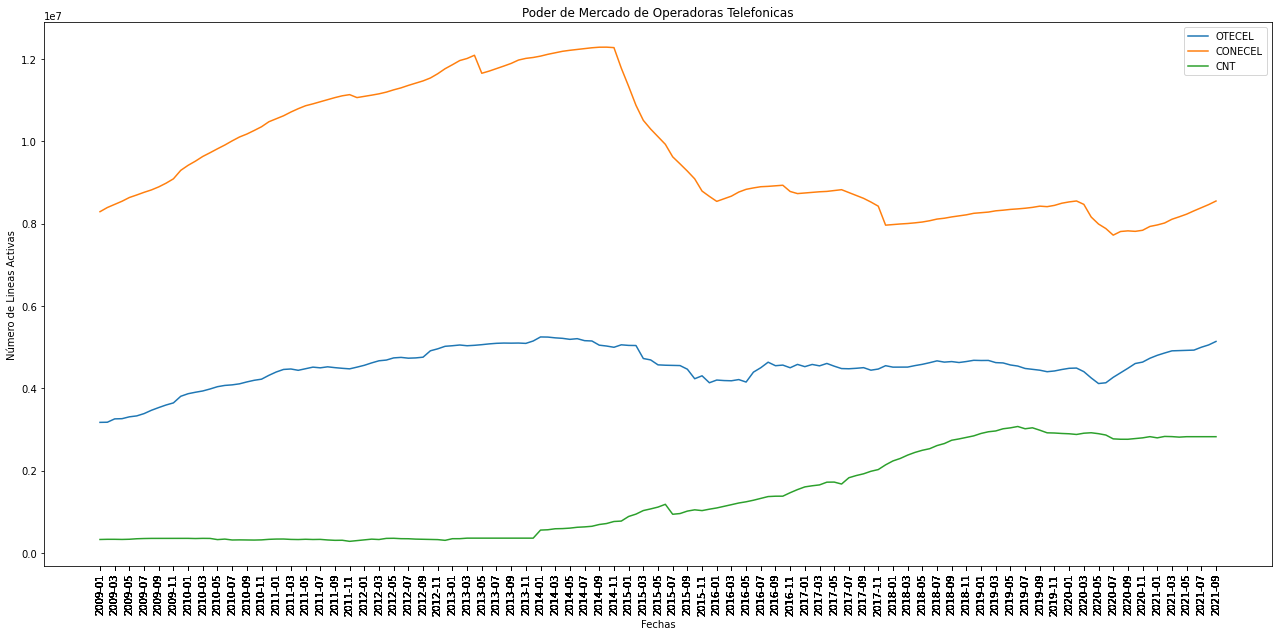

In [71]:
plt.figure(figsize=(22,10))

for i in range(len(operators)):
  df_seg = smadata[smadata['nombre']==operators[i]]
  plt.plot(df_seg['fecha'],df_seg['lines'])
  plt.xticks(rotation='vertical')

for x in df_seg['fecha']:
  if int(x[-2:])%2!=0:
    xt.append(x)

plt.title('Poder de Mercado de Operadoras Telefonicas')
plt.legend([x.upper() for x in operators])
plt.xticks(xt,rotation='vertical')
plt.ylabel('Número de Lineas Activas')
plt.xlabel('Fechas')

## Trending Modulation and Multiplixing Technologies for SMA in Ecuador

Text(0, 0.5, 'Numero de Lineas Activas')

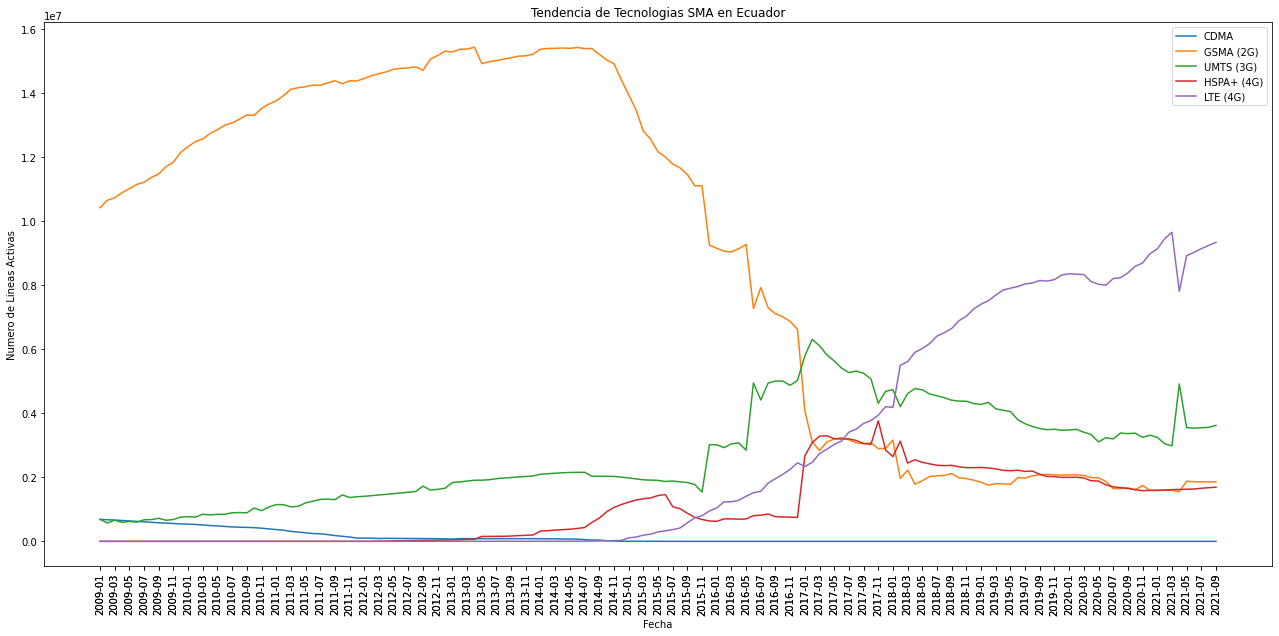

In [46]:
from re import X
categoric = smadata['fecha'].value_counts(sort=False)
df_categoric_columns = np.hstack((['fecha'],technologies))
df_categoric = pd.DataFrame(columns = df_categoric_columns)
df_categoric=[]

for i in range(len(categoric)):
  df_operator = smadata[smadata['fecha'] == categoric.index[i]]
  df_temp=[categoric.index[i]]

  for j in range(len(technologies)):
    df_temp = np.hstack((df_temp,sum(df_operator[technologies[j]])))  
  
  df_temp=pd.DataFrame([df_temp],columns = df_categoric_columns)
  if i==0:
    df_categoric = df_temp
  else:
    df_categoric=pd.concat([df_categoric,df_temp],ignore_index=True)

    
plt.figure(figsize=(22,10))
for i in range(len(technologies)):
  plt.plot(df_categoric['fecha'],[int(x) for x in df_categoric[technologies[i]]])

plt.legend([x.upper() for x in technologies_titles])
plt.xticks(yt ,rotation='vertical')
plt.title('Tendencia de Tecnologias SMA en Ecuador')
plt.xlabel('Fecha')
plt.ylabel('Numero de Lineas Activas')